In [1]:
import tensorflow
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
img_array = cv2.imread(r"data\train\closed\s0001_00056_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)


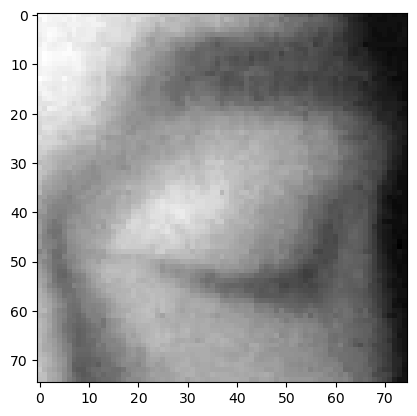

In [5]:
plt.imshow(img_array, cmap="gray")


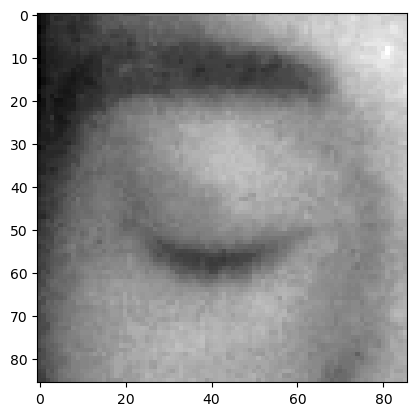

In [6]:
Datadirectory = "data/train"

Classes = ["closed", "open"]

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

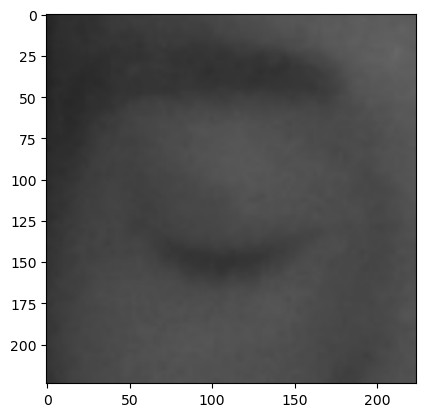

In [7]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [8]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()
print(len(training_Data))

67919


In [10]:
import random
random.shuffle(training_Data)

In [11]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)


In [12]:
print(X.shape)

(67919, 224, 224, 3)


In [13]:
Y = np.array(y)

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [15]:
#later to load again directly
import pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
Y = np.array(y)

In [17]:
Y

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
import tensorflow as tf
from tensorflow import keras


In [19]:
from tensorflow.keras import layers

In [14]:
import tensorflow as tf
from tensorflow.keras import layers

# Load the MobileNet model
model = tf.keras.applications.MobileNet()
model.summary()

# Get input and output of the base MobileNet model
base_input = model.input
base_output = model.get_layer('conv_pw_13_relu').output  # Example layer name from MobileNet

# Flatten the output
flat_layer = layers.Flatten()(base_output)

# Add new layers
dense_layer = layers.Dense(1)(flat_layer)
output_layer = layers.Activation('sigmoid')(dense_layer)

# Create a new model
new_model = tf.keras.Model(inputs=base_input, outputs=output_layer)
new_model.summary()


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 3,257,153 (12.43 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [15]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [16]:
new_model.fit(X, Y, epochs=25, validation_split=0.1)  # training



Epoch 1/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 4155s 2s/step - accuracy: 0.9659 - loss: 0.2669 - val_accuracy: 0.9476 - val_loss: 0.3152
Epoch 2/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 3974s 2s/step - accuracy: 0.9822 - loss: 0.0563 - val_accuracy: 0.9828 - val_loss: 0.0508
Epoch 3/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 4005s 2s/step - accuracy: 0.9850 - loss: 0.0453 - val_accuracy: 0.9884 - val_loss: 0.0348
Epoch 4/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 4055s 2s/step - accuracy: 0.9894 - loss: 0.0302 - val_accuracy: 0.9881 - val_loss: 0.0352
Epoch 5/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 3859s 2s/step - accuracy: 0.9869 - loss: 0.0423 - val_accuracy: 0.9885 - val_loss: 0.0348
Epoch 6/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 2807s 1s/step - accuracy: 0.9887 - loss: 0.0321 - val_accuracy: 0.9890 - val_loss: 0.0305
Epoch 7/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 2795s 1s/step - accuracy: 0.9904 - loss: 0.0264 - val_accuracy: 0.9863 - val_loss: 0.0426
Epoch 8/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 2788s 1s/step - accuracy: 0.9906 -

In [18]:
# Save the model
new_model.save('youtube_model.keras')

In [20]:
# Load the model
import tensorflow as tf
from tensorflow.keras import layers
new_model = tf.keras.models.load_model('youtube_model.keras')

C:\Users\rajat\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 85 variables whereas the saved optimizer has 168 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


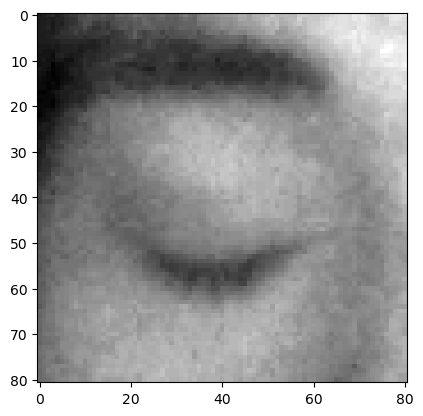

In [48]:
Datadirectory = "data/test"

Classes = ["closed", "open"]

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

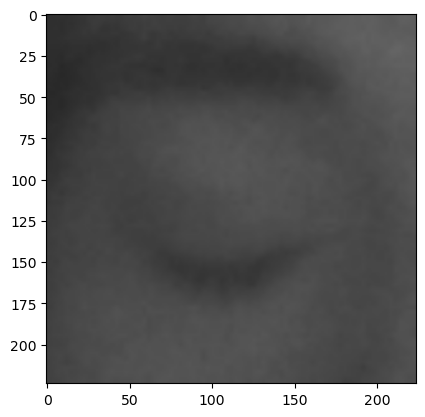

In [49]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [52]:
test_Data = []

def create_test_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                test_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [53]:
create_test_Data()
print(len(test_Data))

16979


In [68]:
test_Data

[[array([[[88, 88, 88],
          [88, 88, 88],
          [88, 88, 88],
          ...,
          [62, 62, 62],
          [62, 62, 62],
          [62, 62, 62]],
  
         [[88, 88, 88],
          [88, 88, 88],
          [88, 88, 88],
          ...,
          [62, 62, 62],
          [62, 62, 62],
          [62, 62, 62]],
  
         [[87, 87, 87],
          [87, 87, 87],
          [87, 87, 87],
          ...,
          [63, 63, 63],
          [63, 63, 63],
          [63, 63, 63]],
  
         ...,
  
         [[69, 69, 69],
          [68, 68, 68],
          [67, 67, 67],
          ...,
          [68, 68, 68],
          [68, 68, 68],
          [67, 67, 67]],
  
         [[69, 69, 69],
          [68, 68, 68],
          [67, 67, 67],
          ...,
          [67, 67, 67],
          [67, 67, 67],
          [67, 67, 67]],
  
         [[69, 69, 69],
          [68, 68, 68],
          [67, 67, 67],
          ...,
          [67, 67, 67],
          [67, 67, 67],
          [67, 67, 67]]], dtype=u

In [54]:
import random
random.shuffle(test_Data)

In [57]:
X_test = []
y_test= []

for features, label in test_Data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [70]:
y_test


array([1, 1, 0, ..., 1, 0, 0])

In [58]:
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)

531/531 ━━━━━━━━━━━━━━━━━━━━ 137s 255ms/step - accuracy: 0.9869 - loss: 0.0514
Test Accuracy: 0.9878084659576416


In [61]:
# Predict on test data
y_pred = new_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)



531/531 ━━━━━━━━━━━━━━━━━━━━ 129s 244ms/step


In [73]:
y_pred_binary

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [81]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Extract TP, TN, FP, FN
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print TP, TN, FP, FN
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


Confusion Matrix:
[[8322   67]
 [ 140 8450]]
True Positive (TP): 8450
True Negative (TN): 8322
False Positive (FP): 67
False Negative (FN): 140


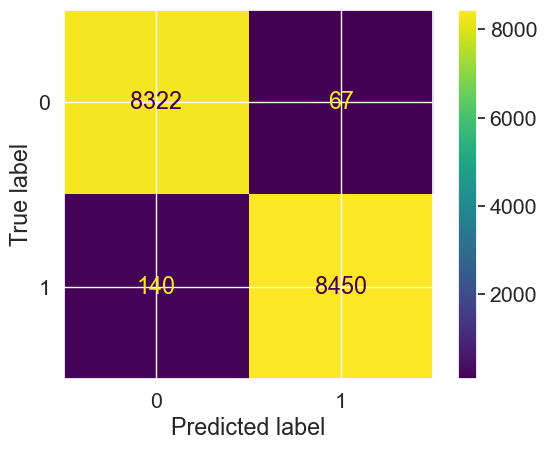

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

actual = np.random.binomial(1, 0.9, size=1000)
predicted = np.random.binomial(1, 0.9, size=1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['0', '1'])

cm_display.plot()
plt.show()


In [62]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8389
           1       0.99      0.98      0.99      8590

    accuracy                           0.99     16979
   macro avg       0.99      0.99      0.99     16979
weighted avg       0.99      0.99      0.99     16979



In [27]:
# Checking the network for predictions
img_size = 224
img_array = cv2.imread(r"C:\Users\rajat\OneDrive\Desktop\drowsiness\data\test\open\s0001_01849_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [28]:
# Prepare the input data for prediction
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
#X_input = X_input / 255.0  # Normalize the input

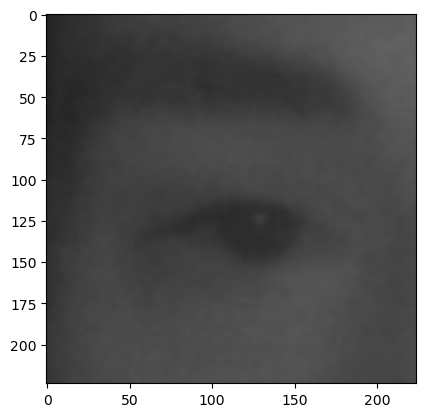

In [29]:
# Display the resized image
plt.imshow(new_array)


In [30]:
# Predict using the loaded model
prediction = new_model.predict(X_input)
pred=(prediction > 0.5).astype(int)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
[[1]]


In [94]:
# Checking the network for predictions
img_size = 224
img_arrays = cv2.imread(r"C:\Users\rajat\OneDrive\Desktop\drowsiness\data\test\closed\s0001_00005_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgbs = cv2.cvtColor(img_arrays, cv2.COLOR_GRAY2RGB)
new_arrays = cv2.resize(backtorgbs, (img_size, img_size))

In [95]:
# Prepare the input data for prediction
X_inputs = np.array(new_arrays).reshape(1, img_size, img_size, 3)
#X_inputs = X_inputs / 255.0  # Normalize the input

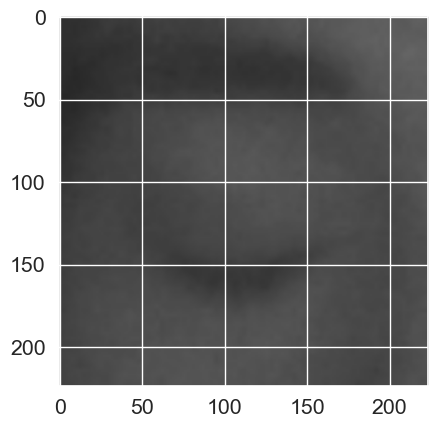

In [96]:
# Display the resized image
plt.imshow(new_arrays)

In [97]:
# Predict using the loaded model
prediction = new_model.predict(X_inputs)
pred=(prediction > 0.5).astype(int)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
[[0]]


In [98]:
img = cv2.imread(r'C:\Users\rajat\OneDrive\Desktop\drowsiness\data\images.jpg')

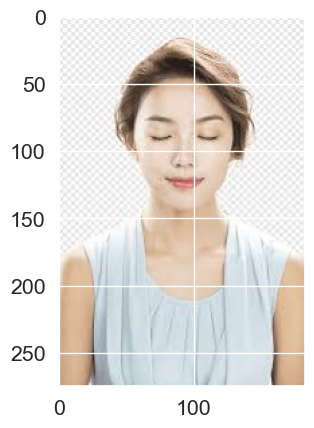

In [115]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [116]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [117]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [120]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [121]:
eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

In [122]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

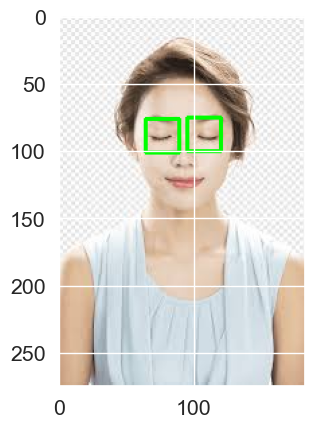

In [123]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

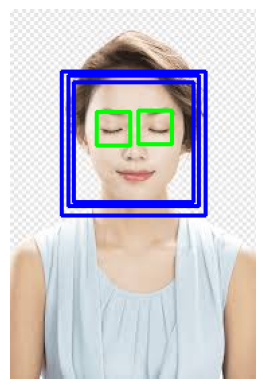

In [156]:
import cv2
import matplotlib.pyplot as plt

# Load the image
#img = cv2.imread('your_image_path.jpg')

# Load Haar cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect eyes in the grayscale image
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangles around the detected eyes in the original image
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# For each detected eye region (ROI), draw rectangles around the detected eyes
for (x, y, w, h) in eyes:
    # Crop the region of interest (eye region)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect eyes within the ROI
    eyess = eye_cascade.detectMultiScale(roi_gray)
    
    # Draw rectangles around the detected eyes within the ROI
    for (ex, ey, ew, eh) in eyess:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with detected eyes and eyes within the ROI
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


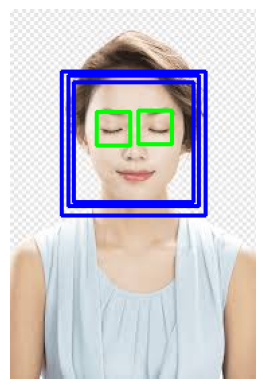

In [157]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [158]:
import cv2
import numpy as np
import os

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to detect and crop eyes from the face image
def detect_and_crop_eyes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # Loop over detected faces
    for (x, y, w, h) in faces:
        # Crop the face region
        face_roi = image[y:y+h, x:x+w]
        
        # Convert the face region to grayscale
        gray_face = gray[y:y+h, x:x+w]
        
        # Detect eyes in the grayscale face region
        eyes = eye_cascade.detectMultiScale(gray_face)
        
        # Loop over detected eyes
        for (ex, ey, ew, eh) in eyes:
            # Crop the eye region from the face
            eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
            
            # Resize the cropped eye image to a consistent size (e.g., 100x100)
            eye_roi_resized = cv2.resize(eye_roi, (100, 100))
            
            # Display the cropped eye region (optional)
            cv2.imshow('Cropped Eye', eye_roi_resized)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            
            # Save the cropped eye image to a folder (you can modify the path)
            save_path = 'cropped_eyes'
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            cv2.imwrite(os.path.join(save_path, 'eye_{}.jpg'.format(len(os.listdir(save_path)))), eye_roi_resized)

# Load the image
img = cv2.imread(r'C:\Users\rajat\OneDrive\Desktop\drowsiness\data\images.jpg')

# Detect and crop eyes from the image
detect_and_crop_eyes(img)


In [159]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load your trained model
model = tf.keras.models.load_model('youtube_model.keras')

# Function to preprocess and predict the eye image
def preprocess_and_predict_eye(image):
    img_size = 224
    
    # Convert the eye image to grayscale
    gray_eye = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Convert the grayscale eye image to RGB
    eye_rgb = cv2.cvtColor(gray_eye, cv2.COLOR_GRAY2RGB)
    
    # Resize the eye image to match the input size of the model
    resized_eye = cv2.resize(eye_rgb, (img_size, img_size))
    
    # Reshape and preprocess the eye image for model input
    X_input = np.array(resized_eye).reshape(1, img_size, img_size, 3) / 255.0  # Normalize pixel values
    
    # Predict whether the eye is open or closed using the model
    prediction = model.predict(X_input)
    
    # Return the predicted label (e.g., 0 for closed, 1 for open)
    return prediction[0][0]

# Load the image
img = cv2.imread(r'C:\Users\rajat\OneDrive\Desktop\drowsiness\data\images.jpg')

# Detect faces in the image
faces = face_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 1.3, 5)

# Loop over detected faces
for (x, y, w, h) in faces:
    # Crop the face region
    face_roi = img[y:y+h, x:x+w]
    
    # Convert the face region to grayscale
    gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
    
    # Detect eyes in the grayscale face region
    eyes = eye_cascade.detectMultiScale(gray_face)
    
    # Loop over detected eyes
    for (ex, ey, ew, eh) in eyes:
        # Crop the eye region from the face
        eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
        
        # Preprocess and predict the eye image
        prediction = preprocess_and_predict_eye(eye_roi)
        
        # Print the prediction (you can perform further actions based on the prediction)
        if prediction < 0.5:
            print("Closed eye detected")
        else:
            print("Open eye detected")


C:\Users\rajat\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 85 variables whereas the saved optimizer has 168 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Closed eye detected


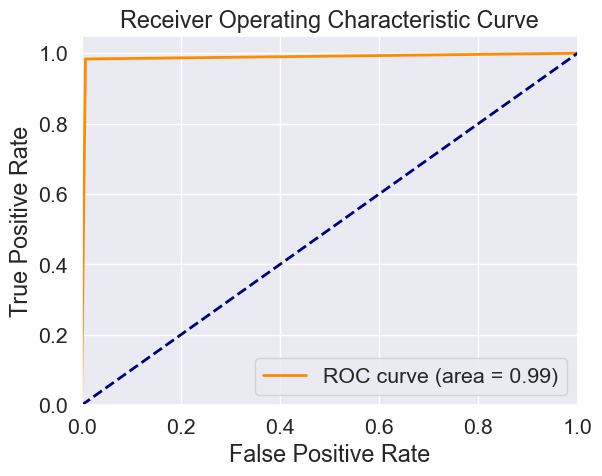

In [160]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test contains true labels and y_pred contains predicted probabilities or scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


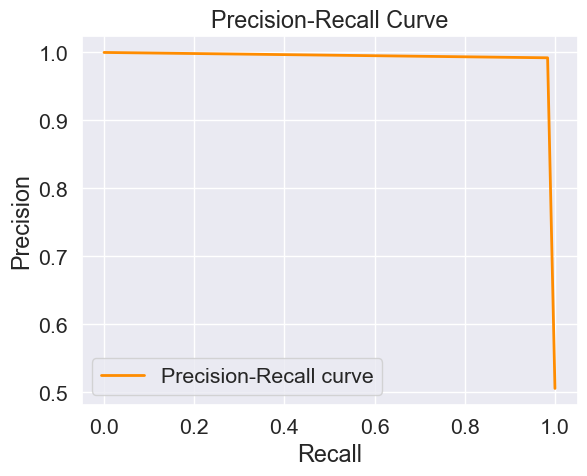

In [161]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_binary)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [162]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming y_test contains true labels and y_pred contains predicted labels
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.9878084692855881
F1 Score: 0.9878996901853042


Try with webcam 

In [6]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load your trained eye detection model


# Function to preprocess and predict eye image
def preprocess_and_predict_eye(image):
    img_size = 224
    
    # Preprocess the image
    # Convert to grayscale
    gray_eye = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert to RGB
    eye_rgb = cv2.cvtColor(gray_eye, cv2.COLOR_GRAY2RGB)
    # Resize
    resized_eye = cv2.resize(eye_rgb, (img_size, img_size))
    # Reshape and normalize
    X_input = np.array(resized_eye).reshape(1, img_size, img_size, 3) / 255.0
    
    # Predict using the model
    prediction = model.predict(X_input)
    
    return prediction[0][0]

# Access the webcam
cap = cv2.VideoCapture(0)

# Counter to track consecutive frames with closed eyes
closed_eye_counter = 0

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop over detected faces
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Crop face region
        face_roi = frame[y:y+h, x:x+w]
        gray_face = gray[y:y+h, x:x+w]
        
        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(gray_face)
        
        # Loop over detected eyes
        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around the eye
            cv2.rectangle(face_roi, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
            # Crop eye region
            eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
            
            # Predict eye state using the model
            prediction = preprocess_and_predict_eye(eye_roi)
            
            # Display the predicted eye state
            if prediction < 0.5:
                # Increment the counter if eye is closed
                closed_eye_counter += 1
                if closed_eye_counter >= 20:
                    cv2.putText(face_roi, 'Sleepy', (ex, ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            else:
                # Reset the counter if eye is open
                closed_eye_counter = 0
                cv2.putText(face_roi, 'Open', (ex, ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Eye Detection', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


NameError: name 'model' is not defined

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')


In [3]:
# Load your trained model
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.models.load_model('youtube_model.keras')

C:\Users\rajat\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 85 variables whereas the saved optimizer has 168 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [4]:
# Function to preprocess and predict eye image
def preprocess_and_predict_eye(image):
    img_size = 224
    
    # Preprocess the image
    # Convert to grayscale
    gray_eye = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert to RGB
    eye_rgb = cv2.cvtColor(gray_eye, cv2.COLOR_GRAY2RGB)
    # Resize
    resized_eye = cv2.resize(eye_rgb, (img_size, img_size))
    # Reshape and normalize
    X_input = np.array(resized_eye).reshape(1, img_size, img_size, 3) 
    
    # Predict using the model
    prediction = model.predict(X_input)
    
    return prediction[0][0]

In [5]:
# Initialize alarm sound
from pygame import mixer
mixer.init()
sound = mixer.Sound(r'C:\Users\rajat\OneDrive\Desktop\drowsiness\alarm.wav')

pygame 2.5.2 (SDL 2.28.3, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
# Access the webcam
cap = cv2.VideoCapture(0)

# Counter to track consecutive frames with closed eyes
closed_eye_counter = 0
sleepy_counter = 0
alarm_active = False


In [7]:
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop over detected faces
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Crop face region
        face_roi = frame[y:y+h, x:x+w]
        gray_face = gray[y:y+h, x:x+w]
        
        # Detect eyes in the face region
        #eyes = eye_cascade.detectMultiScale(gray_face)
        eyes = eye_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20))
        
        # Loop over detected eyes
        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around the eye
            cv2.rectangle(face_roi, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
            # Crop eye region
            eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
            
            # Predict eye state using the model
            prediction = preprocess_and_predict_eye(eye_roi)
            
            # Display the predicted eye state
            if prediction < 0.5:
                # Increment the counter if eye is closed
                closed_eye_counter += 1
                if closed_eye_counter >= 10:
                    #sleepy_counter += 1
                    cv2.putText(face_roi, 'Sleepy', (ex, ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                    # Activate alarm if the person is sleepy for more than 20 frames
                    if closed_eye_counter >= 10 and not alarm_active:
                        sound.play()
                        alarm_active = True
            else:
                # Reset the counter if eye is open
                closed_eye_counter = 0
                #sleepy_counter = 0
                alarm_active = False
                cv2.putText(face_roi, 'Open', (ex, ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Display the counter of sleepy frames
    cv2.putText(frame, f'Sleepy Counter: {closed_eye_counter}', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the resulting frame
    cv2.imshow('Eye Detection', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━